In [ ]:
import matplotlib.pyplot as plt
import csv
from statistics import mean

In [ ]:
#@title
#r2_score=[]
def classifier_perf_metric(cl):
  acc=[]
  precision=[]
  recall=[]
  f1_score=[]
  batch = []
  with open(cl+'.csv', 'r') as file:
    data = csv.reader(file, delimiter = ',')

    for row in data:
      #r2_score.append(float(row[0]))
      acc.append(float(row[1]))
      precision.append(float(row[2]))
      recall.append(float(row[3]))
      f1_score.append(float(row[4]))
  batch = [i+1 for i in range(len(acc))]
  plotting(acc, precision, recall, f1_score, batch)
  file.close()


In [ ]:
#@title
'''plt.bar(batch, r2_score, color = 'g', label = 'r2_score for each batch')
plt.xlabel('Batch')
plt.ylabel('r2_score')
plt.legend()
plt.show()'''

In [ ]:
#@title
def plotting(acc, precision, recall, f1_score, batch):
  #batch=[1,2,3,4,5,6,7,8,9]
  plt.bar(batch, acc, color = 'r', label = 'accuracy for each batch')
  plt.xlabel('Batch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

  plt.bar(batch, precision, color = 'b', label = 'precision for each batch')
  plt.xlabel('Batch')
  plt.ylabel('Precision')
  plt.legend()
  plt.show()

  plt.bar(batch, recall, color = 'y', label = 'recall for each batch')
  plt.xlabel('Batch')
  plt.ylabel('Recall')
  plt.legend()
  plt.show()

  plt.bar(batch, f1_score, color = 'm', label = 'f1 score for each batch')
  plt.xlabel('Batch')
  plt.ylabel('f1 score')
  plt.legend()
  plt.show()

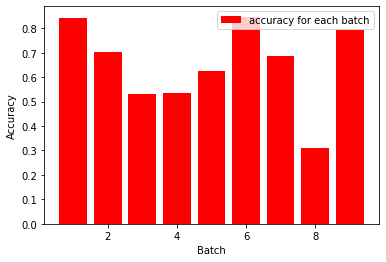

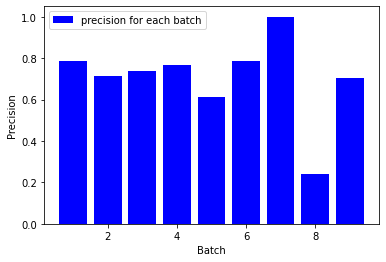

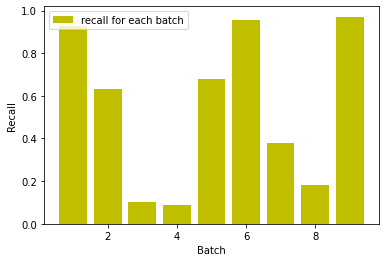

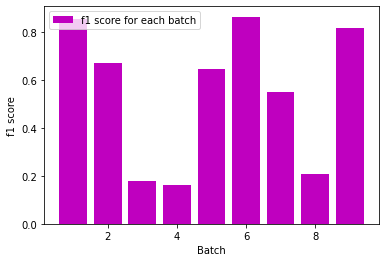

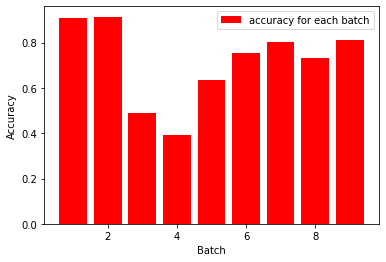

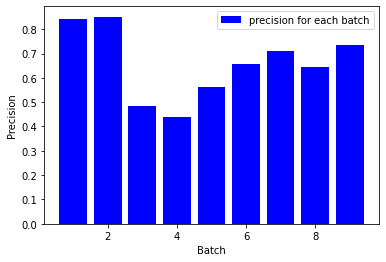

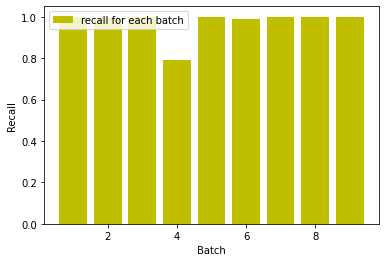

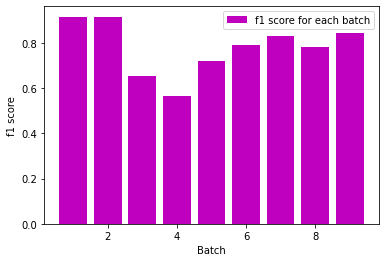

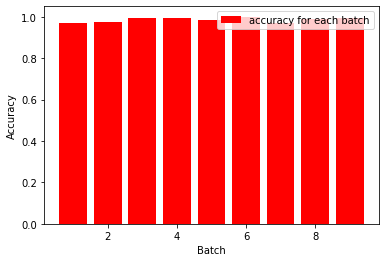

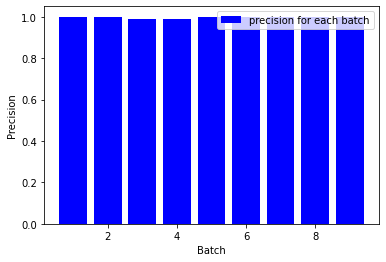

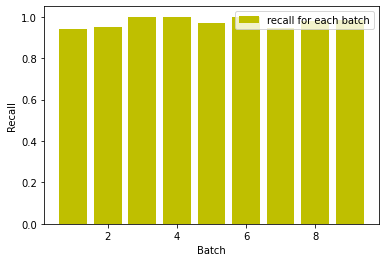

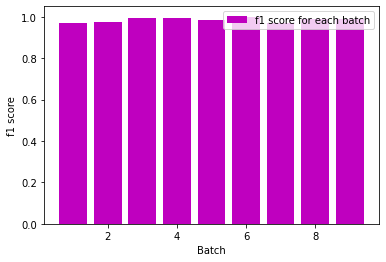

In [ ]:
classifier_perf_metric('mNB')
classifier_perf_metric('bNB')
classifier_perf_metric('SGD')